#3- Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [3]:
!wget  $data -O data-week-3.csv

--2023-10-01 18:30:53--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.04s   

2023-10-01 18:30:54 (21.4 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8034066713981547

# 4- Model Evaluation Metrics

## 4.2 - Accuracy and Dummy Model

In [38]:
(y_val==churn_decision).mean()

0.8034066713981547

In [39]:
len(y_val)

1409

In [40]:
(y_val==churn_decision).sum()

1132

In [42]:
1132/1409

0.8034066713981547

In [43]:
thresholds = np.linspace(0,1,21)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
scores=[]
for t in thresholds:
  churn_decision = (y_pred>=t)
  #score = (churn_decision==y_val).mean()
  score = accuracy_score(y_val,y_pred>=t )
  print('%.3f, %.2f'%(score,t))
  scores.append(score)


0.274, 0.00
0.510, 0.05
0.591, 0.10
0.667, 0.15
0.710, 0.20
0.737, 0.25
0.760, 0.30
0.773, 0.35
0.785, 0.40
0.793, 0.45
0.803, 0.50
0.801, 0.55
0.795, 0.60
0.786, 0.65
0.765, 0.70
0.744, 0.75
0.735, 0.80
0.726, 0.85
0.726, 0.90
0.726, 0.95
0.726, 1.00


In [46]:
scores

[0.2739531582682754,
 0.5102909865152591,
 0.5911994322214337,
 0.6671398154719659,
 0.7097232079489,
 0.7374024130589071,
 0.7601135557132718,
 0.772888573456352,
 0.7849538679914834,
 0.7927608232789212,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.7650816181689141,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

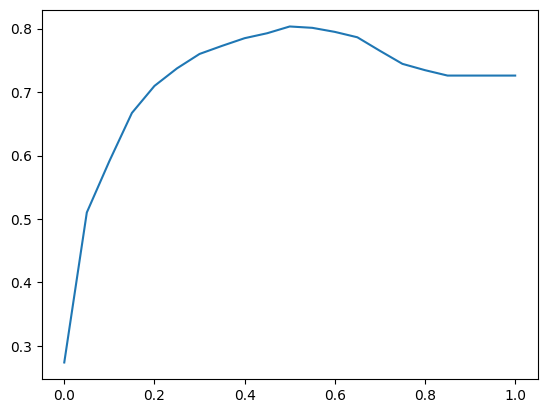

In [47]:
plt.plot(thresholds,scores)

In [48]:
from collections import Counter

In [49]:
Counter(y_pred>=0)

Counter({True: 1409})

In [50]:
1-y_val.mean()

0.7260468417317246

## 4.3 - Confusion Table

In [51]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)


In [52]:
t =0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)


In [53]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


In [54]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [175, 211]])

In [55]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 - Precision and Recall

**Precision**: Fraction of positive predictions that are correct.

In [56]:
prec= tp/(tp+fp)

In [57]:
prec

0.6741214057507987

**Recall**: Fraction of correctly identified positive examples.

In [58]:
rec = tp / (tp + fn)

In [59]:
rec

0.5466321243523317

##4.5 - ROC Curves

In [60]:
tpr=tp/(tp+fn)
tpr

0.5466321243523317

In [61]:
fpr = fp/ (fp+tn)
fpr

0.09970674486803519

In [62]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [63]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

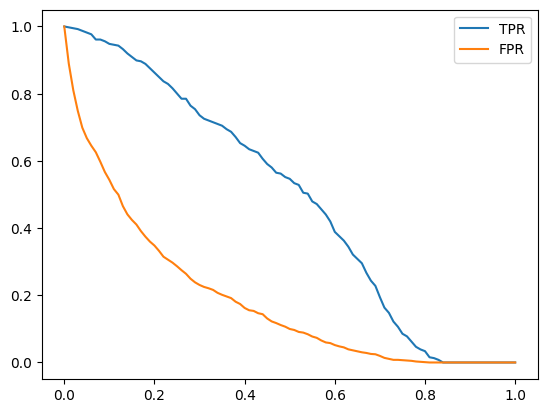

In [64]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

###Random Model

In [65]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [66]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [67]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [68]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)


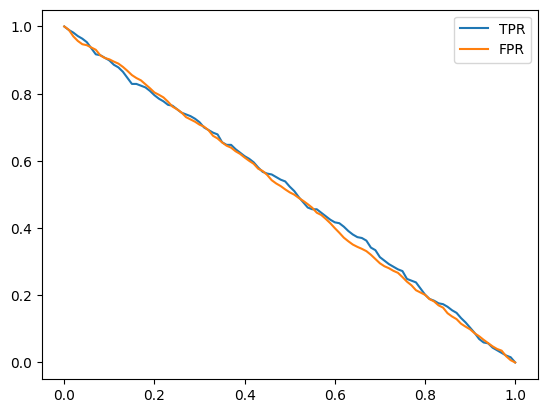

In [69]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

###Ideal Model

In [70]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [71]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [74]:
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [72]:
1 - y_val.mean()


0.7260468417317246

In [73]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)


1.0

In [75]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


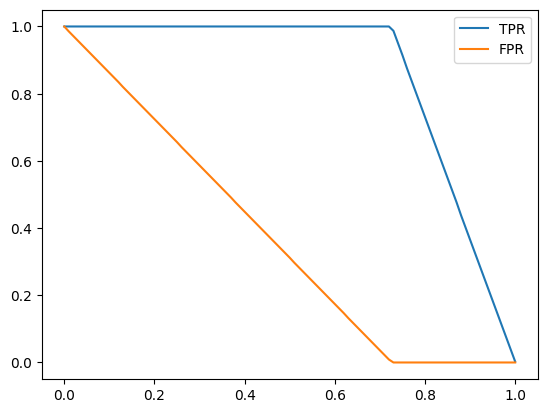

In [76]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

###Putting everything together

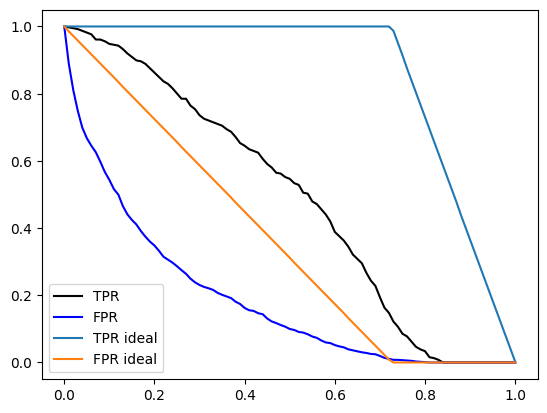

In [77]:

plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

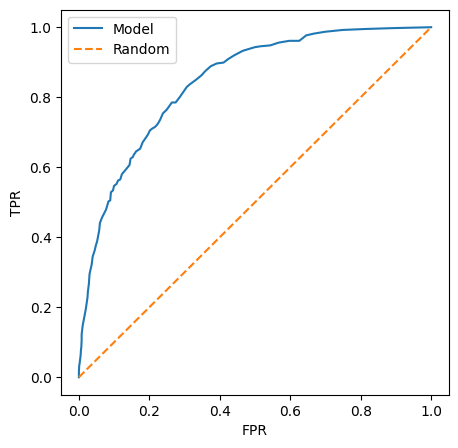

In [78]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [79]:
from sklearn.metrics import roc_curve


In [80]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)


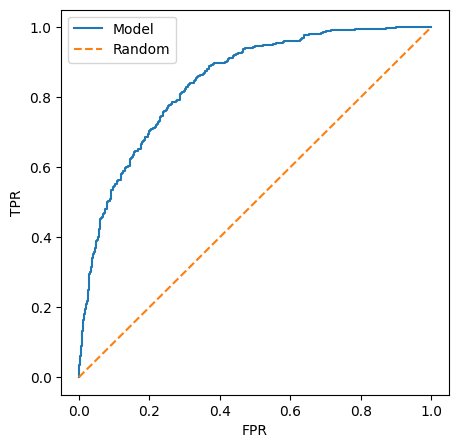

In [81]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.6 - ROC AUC

In [83]:
from sklearn.metrics import auc


In [85]:
auc(fpr,tpr)

0.8438834272864024

In [86]:
auc(df_scores.fpr, df_scores.tpr)


0.8435871332411529

In [87]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438834272864024

In [88]:
auc(df_ideal.fpr, df_ideal.tpr)


0.9999430203759136

In [89]:
from sklearn.metrics import roc_auc_score


In [90]:
roc_auc_score(y_val, y_pred)


0.8438834272864024

In [91]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

**AUC:** Probability of a randomly selected positive example has a higher score than a randomly selected negative example.

In [93]:
neg = y_pred[y_val ==0]
pos = y_pred[y_val ==1]

In [98]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [97]:
neg

array([0.00889774, 0.20477037, 0.21275457, ..., 0.10862369, 0.31171576,
       0.13567362])

In [94]:
import random

In [95]:
pos_ind = random.randint(0, len(pos)-1)
neg_ind = random.randint(0, len(neg)-1)

In [96]:
pos[pos_ind]> neg[neg_ind]

True

In [101]:
n = 100000
success=0
for i in range (n):
  pos_ind = random.randint(0, len(pos)-1)
  neg_ind = random.randint(0, len(neg)-1)

  if pos[pos_ind] > neg[neg_ind]:
      success = success + 1
success/n

0.84484

In [104]:
n =50000
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos),size =n)
neg_ind = np.random.randint(0, len(neg),size =n)
(pos[pos_ind] > neg[neg_ind]).mean()


0.8466

##4.7 - Cross-Validation

In [105]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [106]:
dv, model = train(df_train, y_train, C=0.001)


In [107]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [108]:
y_pred = predict(df_val, dv, model)


In [109]:
from sklearn.model_selection import KFold

In [111]:
!pip install tqdm


In [112]:
from tqdm.auto import tqdm


In [119]:
n_splits=5

# C = regularization parameter for the model
# tqdm() is a function that prints progress bars
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

  kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)

  scores = []

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

  print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))



  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.841 +- 0.007
C=1 0.841 +- 0.009
C=5 0.841 +- 0.008
C=10 0.841 +- 0.007


In [120]:
scores

[0.8422416026249893,
 0.8458130545623096,
 0.8325145494681917,
 0.8337976434098612,
 0.8509146245803395]

In [121]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

##4.8 Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)